## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import numpy as np

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
#LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
MOMENTUM = np.linspace(0.1, 0.95, num=5, endpoint=True)

In [7]:
# nesterov=False
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
#for lr in LEARNING_RATE:
for moment in MOMENTUM:
    lr = LEARNING_RATE
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (moment))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=moment)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(moment)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0716 21:34:40.462181 27272 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 21:34:40.463179 27272 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 21:34:40.489117 27272 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 21:34:40.491131 27272 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 21:34:40.494102 27272 

Experiment with MOMENTUM = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.0575 - acc: 0.2649 - val_loss: 1.9359 - val_acc: 0.3288
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8693 - acc: 0.3400 - val_loss: 1.8558 - val_acc: 0.3411
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7970 - acc: 0.3677 - val_loss: 1.7984 - val_acc: 0.3676
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7413 - acc: 0.3880 - val_loss: 1.7492 - val_acc: 0.3738
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7014 - acc: 0.3994 - val_loss: 1.7109 - val_acc: 0.3972
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6710 - acc: 0.4112 - val_loss: 1.6466 - val_acc: 0.4203
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6353 - acc: 0.4239 - val_loss: 1.6967 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 1.8063 - acc: 0.3629 - val_loss: 1.7921 - val_acc: 0.3496
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7293 - acc: 0.3905 - val_loss: 1.8762 - val_acc: 0.3217
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6794 - acc: 0.4092 - val_loss: 1.6410 - val_acc: 0.4244
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6322 - acc: 0.4237 - val_loss: 1.6205 - val_acc: 0.4238
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6008 - acc: 0.4351 - val_loss: 1.6253 - val_acc: 0.4302
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5703 - acc: 0.4446 - val_loss: 1.6084 - val_acc: 0.4237
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5434 - acc: 0.4569 - val_loss: 1.6441 - val_acc: 0.3987
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 54us/step - loss: 1.6594 - acc: 0.4120 - val_loss: 1.7159 - val_acc: 0.3841
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6059 - acc: 0.4323 - val_loss: 1.7014 - val_acc: 0.3910
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5627 - acc: 0.4484 - val_loss: 1.5835 - val_acc: 0.4360
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5230 - acc: 0.4612 - val_loss: 1.5407 - val_acc: 0.4534
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4914 - acc: 0.4722 - val_loss: 1.5396 - val_acc: 0.4558
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4600 - acc: 0.4841 - val_loss: 1.5421 - val_acc: 0.4486
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4281 - acc: 0.4969 - val_loss: 1.5422 - val_acc: 0.4435
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 55us/step - loss: 1.4531 - acc: 0.4831 - val_loss: 1.5871 - val_acc: 0.4461
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4050 - acc: 0.5023 - val_loss: 1.4153 - val_acc: 0.5006
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3602 - acc: 0.5164 - val_loss: 1.4167 - val_acc: 0.4993
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3262 - acc: 0.5285 - val_loss: 1.4283 - val_acc: 0.4818
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.2919 - acc: 0.5430 - val_loss: 1.3957 - val_acc: 0.5081
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.2562 - acc: 0.5531 - val_loss: 1.5379 - val_acc: 0.4735
Epoch 10/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.2292 - acc: 0.5625 - val_loss: 1.3554 - val_acc: 0.5174
Epoch 11/50
50000/50000 [==========================

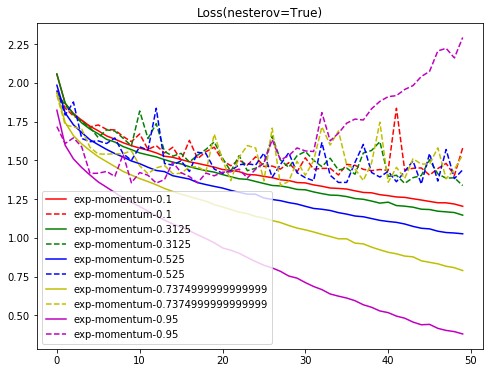

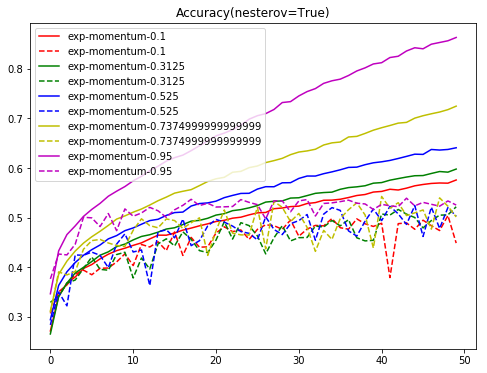

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(nesterov=True)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(nesterov=True)")
plt.legend()
plt.show()

In [7]:
# nesterov=False
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
#for lr in LEARNING_RATE:
for moment in MOMENTUM:
    lr = LEARNING_RATE
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (moment))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=moment)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(moment)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0716 22:07:31.760949 18436 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 22:07:31.762919 18436 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 22:07:31.779897 18436 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 22:07:31.780895 18436 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 22:07:31.783863 18436 

Experiment with MOMENTUM = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0445 - acc: 0.2685 - val_loss: 1.8970 - val_acc: 0.3275
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8489 - acc: 0.3465 - val_loss: 1.8104 - val_acc: 0.3628
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7792 - acc: 0.3729 - val_loss: 1.8023 - val_acc: 0.3581
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7322 - acc: 0.3890 - val_loss: 1.7236 - val_acc: 0.3964
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6966 - acc: 0.4010 - val_loss: 1.7106 - val_acc: 0.3868
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6617 - acc: 0.4144 - val_loss: 1.6561 - val_acc: 0.4168
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6336 - acc: 0.4240 - val_loss: 1.6415 - val_acc

50000/50000 [==============================] - 3s 60us/step - loss: 1.7925 - acc: 0.3653 - val_loss: 1.7969 - val_acc: 0.3553
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7177 - acc: 0.3941 - val_loss: 1.6710 - val_acc: 0.4152
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6654 - acc: 0.4111 - val_loss: 1.6961 - val_acc: 0.3910
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6239 - acc: 0.4249 - val_loss: 1.6755 - val_acc: 0.3999
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5877 - acc: 0.4393 - val_loss: 1.5973 - val_acc: 0.4274
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5558 - acc: 0.4519 - val_loss: 1.5877 - val_acc: 0.4319
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5321 - acc: 0.4587 - val_loss: 1.5751 - val_acc: 0.4442
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 56us/step - loss: 1.6653 - acc: 0.4097 - val_loss: 1.6814 - val_acc: 0.3893
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6049 - acc: 0.4321 - val_loss: 1.5879 - val_acc: 0.4307
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5636 - acc: 0.4459 - val_loss: 1.6147 - val_acc: 0.4218
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5219 - acc: 0.4604 - val_loss: 1.5189 - val_acc: 0.4608
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4894 - acc: 0.4718 - val_loss: 1.5691 - val_acc: 0.4303
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4581 - acc: 0.4799 - val_loss: 1.4682 - val_acc: 0.4724
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4307 - acc: 0.4955 - val_loss: 1.5206 - val_acc: 0.4577
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 59us/step - loss: 1.5310 - acc: 0.4535 - val_loss: 1.5077 - val_acc: 0.4588
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4852 - acc: 0.4699 - val_loss: 1.5028 - val_acc: 0.4646
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4412 - acc: 0.4852 - val_loss: 1.4591 - val_acc: 0.4768
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4171 - acc: 0.4926 - val_loss: 1.4657 - val_acc: 0.4803
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3866 - acc: 0.5040 - val_loss: 1.4489 - val_acc: 0.4824
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3673 - acc: 0.5119 - val_loss: 1.4640 - val_acc: 0.4728
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3352 - acc: 0.5237 - val_loss: 1.4397 - val_acc: 0.4864
Epoch 11/50
50000/50000 [==========================

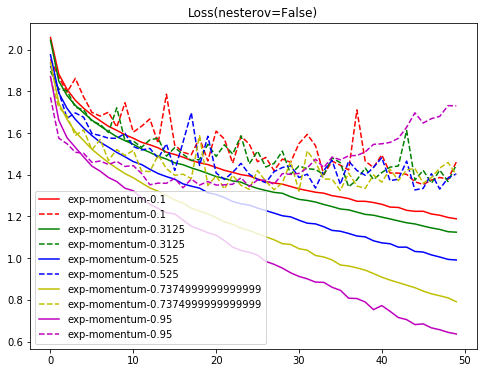

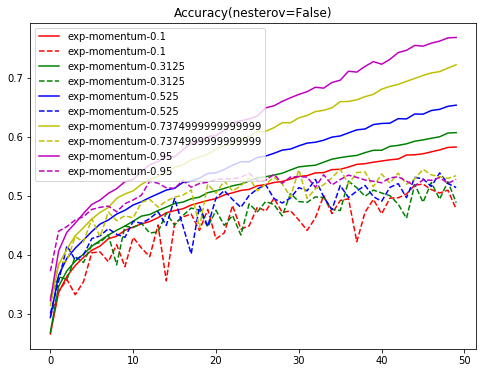

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(nesterov=False)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(nesterov=False)")
plt.legend()
plt.show()